<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week03_HW2_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 핸즈온 머신러닝
### 4장 모델 훈련 p.157-202

### 4. 모델 훈련
작동 원리를 이해하여 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼 파라미터를 빠르게 찾는 과정을 공부한다. 디버깅이나 에러를 효율적으로 분석하는데 도움이 된다.

### 4-1. 선형 회귀
- 일반적으로 선형 모델은 입력 특성의 가중치 합과 편향이라는 상수를 더하여 예측을 만든다.
- 선형 회귀 모델의 예측 : $\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$
- 선형 회귀 모델의 예측(벡터 형태) : $\hat{y} = h_\theta(x) = \theta x$
- 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다.
- 회귀에서 가장 널리 사용되는 성능 측정 지표는 **평균 제곱근 오차(RMSE)**이므로 선형 회귀 모델을 훈련시키려면 **RMSE를 최소화**하는 $\theta$를 찾아야 한다. 실제로는 **평균 제곱 오차인 MSE**를 최소화하는 것이 같은 결과를 내면서 더 간단하다.
- 훈련 세트 X에 대한 선형 회귀 가설의 MSE는 다음과 같다.  $MSE(\theta) = \displaystyle\frac{1}{m}\sum_{i=1}^{m}(\theta^TX^{(i)}-y^{(i)})^2$

### 4-1. 선형 회귀
### 1) 정규방정식
- 비용 함수를 최소화하는 $\theta$값을 찾기 위해 바로 결과를 얻을 수 있는 수학 공식이 있는데 이를 **정규방정식**이라고 한다.
- 정규방정식 : $\hat{\theta} = (X^TX)^{-1}X^Ty$
- 이 공식을 테스트하기 위해 무작위로 선형처럼 보이는 100개의 데이터를 생성하여 정규방정식을 사용해 $\hat{\theta}$을 계산해본다. **`np.linalg`**의 **`inv( )`**함수를 사용하여 **역행렬을 계산**하고, **`dot( )`**을 사용해 **행렬 곱셈**을 한다.
- $\theta_0=4, \theta_1=3$을 기대했으나 잡음 때문에 비슷하지만 원래와 정확하게 같지는 않은 $\theta_0=4.394, \theta_1=3.051$로 구하였다.
---
- 정규방정식으로 얻은 최적 $\theta$를 사용하여 예측을 진행하고, 그래프에 나타낸다.

In [ ]:
# 무작위로 선형 데이터 생성
import numpy as np
X = 2 * np.random.rand(100, 1)

# 선형식의 theta0=4, theta1=3
y = 4 + 3 * X + np.random.rand(100, 1)

# 모든 샘플에 x0=1을 추가
X_b = np.c_[np.ones((100, 1)), X]

In [ ]:
# 최적의 theta0, theta1 계산
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.54837653],
       [2.99059624]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.54837653],
       [10.52956902]])

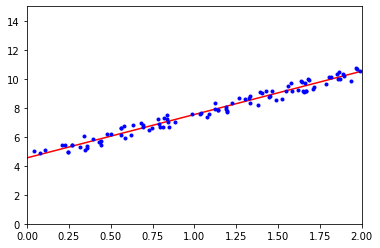

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 4-1. 선형 회귀
### 1) 정규방정식
- 사이킷런에서 선형 회귀를 수행하는 것은 간단하다. **`LinearRegression`** 모델을 학습시켜서 **intercept**와 **coef**를 이용하여 $\theta$값들을 구하고 **predict**를 이용하여 값을 예측한다.
- 또 LinearRegression 클래스는 **`scipy.linalg.lstsq( )`**(최소 제곱) 함수를 기반으로 하는데, 직접 호출하여 최적 $\theta$를 구할 수도 있다. 
- 이 함수는 $\hat{\theta}=X^+y$를 계산한다. 이때 $X^+$는 $X$의 유사역행렬로, **`np.linalg.pinv( )`**를 이용하여 구할 수 있다. 유사역행렬 자체는 특이값 분해(SVD)라는 표준 행렬 분해 기법을 사용하여 계산된다.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.54837653] [[2.99059624]]
[[ 4.54837653]
 [10.52956902]]


In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

# 최적 theta 구하기
theta_best_svd

array([[4.54837653],
       [2.99059624]])

In [ ]:
# 유사역행렬 구하기
X_plus = np.linalg.pinv(X_b)

# 최적 theta 구하기
X_plus.dot(y)

array([[4.54837653],
       [2.99059624]])

### 4-1. 선형 회귀
### 2) 계산 복잡도
- 정규방정식은 (n+1)x(n+1) 크기가 되는 $X^TX$의 역행렬을 계산한다. 이때 n은 특성 수이다.
- 역행렬을 계산하는 **계산 복잡도**는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이이다. 다시 말해 특성 수가 2배로 늘어가면 계싼 시간이 대략 $2^{2.4}=5.3$에서 $2^3=8$배로 증가한다.
- 사이킷런의 LinearRegression 클래스가 사용하는 **SVD 방법**은 약 $O(n^2)$로, **특성 수가 2배**로 늘어나면 **계산 시간이 대략 4배**가 된다.
- 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠르다.
- 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 즉 예측하려는 샘플이 2배로 늘어나면 걸리는 시간도 거의 2배 증가한다.

### 4-2. 경사 하강법
- **경사 하강법(GD)**은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 **일반적인 최적화 알고리즘**이다. 경사 하강법의 기본 아이디어는 **비용 함수를 최소화하기 위해 반복해서 파라미터를 조정**해가는 것이다.
- 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그래디언트를 계산하고, **그래디언트가 감소하는 방향으로 진행**한다. 그러다가 그래디언트가 **0이 되면 최솟값에 도달**한 것이다.
- 구체적으로 보면 $\theta$를 임의의 값으로 시작(무작위 초기화)하여 한번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.

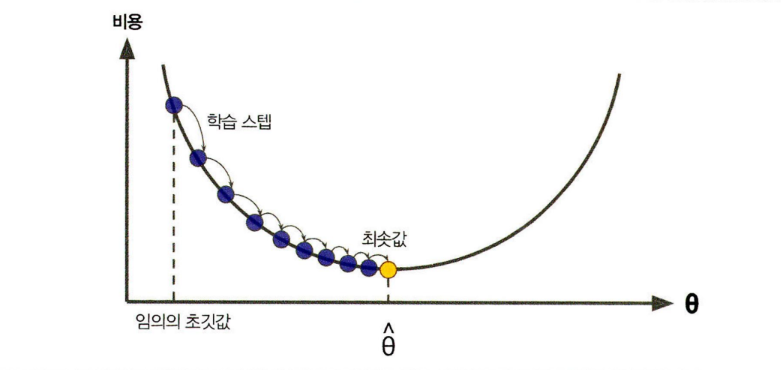

### 4-2. 경사 하강법
- 경사 하강법에서 중요한 파라미터는 **스텝의 크기**로, 하이퍼 파라미터 중에 **학습률(learning rate)**로 결정된다.
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다. 
- 반대로 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 가게 한다. 이는 알고리즘을 더 큰 값으로 발산하게 만들어서 적절한 해법을 찾지 못하게 한다.
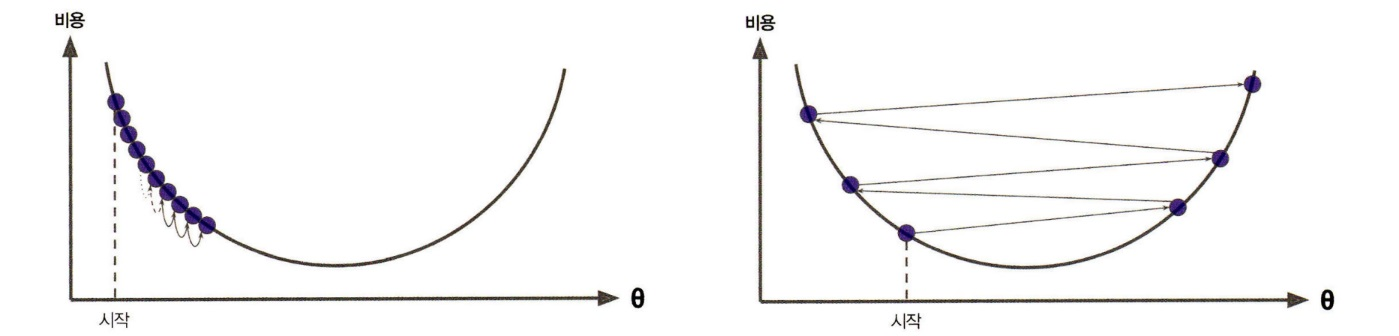

- 모든 비용 함수가 매끈한 그릇과 같지는 않으며 패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다.
- 다음 그림은 경사 하강법의 2가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.
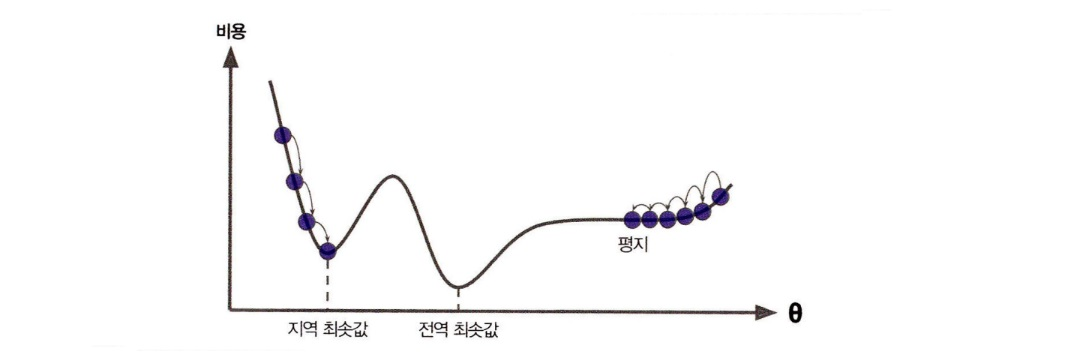

- 다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수이다. 이는 **지역 최솟값이 없고 하나의 전역 최솟값만 있다**는 뜻이다. 또한 연속된 함수이며 기울기가 갑자기 변하지 않는다.
- 이로 인해 **경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다**는 것을 보장한다.



### 4-2. 경사 하강법
### 1) 배치 경사 하강법
- 경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야 한다. 즉 **$\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산**해야 하며, 이를 **편도 함수**라고 한다.
- 파라미터 $\theta_j$에 대한 비용함수의 편도함수는 $\displaystyle\frac{∂}{∂\theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^m(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}$ 이다.
- 편도함수를 각각 계산하는 대신 비용함수의 편도함수를 모두 담고 있는 그래디언트 벡터를 이용하여 한꺼번에 계산할 수 있다. 
- 비용 함수의 그래디언트 벡터 : $∇_\theta MSE(\theta)=$ $\frac{∂}{∂\theta_0}MSE(\theta) \choose ... \frac{∂}{∂\theta_n}MSE(\theta)$ $=\frac{2}{m}X^T(X\theta-y)$
- 위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다. **$\theta$에서 $∇_\theta MSE(\theta)$를 빼야 한다**는 뜻이다. 이때 내려가는 스텝의 크기를 결정하기 위해 **그래디언트 벡터에 학습률 $η$을 곱한다**.
- 경사 하강법의 스텝 : $\theta^{next step} = \theta - \eta∇_\theta MSE(\theta)$
---
- 이 알고리즘을 간단히 구현하여 $\theta$를 계산한다.
- 정규방정식의 찾은 최적 $\theta$와 정확하게 일치하는 것을 확인할 수 있다. 경사 하강법이 완벽하게 작동한 것이다.
---
- 적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 이때 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.
- 반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈추며, 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다.
- 이에 대한 간단한 해결책은 반복 횟수를 아주 크게 지정하고, 그래디언트 벡터가 아주 작아져 허용오차 $ℇ$보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

In [ ]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [ ]:
# 계산된 theta
theta

array([[4.54837653],
       [2.99059624]])

### 4-2. 경사 하강법
### 2) 확률적 경사 하강법
- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용하여 그래디언트를 계산해야 한다는 것인데, 훈련 세트가 커지면 매우 느려지기 때문이다.
- 이와 정반대로 **확률적 경사 하강법**은 **매 스텝에서 한 개의 샘플을 무작위로 선택**하고, 그 **하나의 샘플에 대한 그래디언트를 계산**한다.
- 매 반복에서 다뤄야 하는 데이터가 매우 적기 때문에 한번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠르다.
- 반면에 **확률적, 즉 무작위**이기 때문에 알고리즘이 배치 경사 하강법보다 **훨씬 불안정**하다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 **위아래로 요동치면서 평균적으로 감소**한다. 
- 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지는 못한다. 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.
- 비용 함수가 매우 불규칙할 경우 알고리즘이 **지역 최솟값을 건너뛸 수 있도록** 도와주므로, 확률적 경사 하강법이 배치 경사 하강법보다 **전역 최솟값을 찾을 가능성이 높다**.
---
- 무작위성은 지역 최솟값에서 탈출시켜주지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않다. 이 딜레마를 해결하는 하나의 방법은 **학습률을 점진적으로 감소시키는 것**이다. 
- 시작할 때는 학습률을 크게 하여 수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 하다가, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다. 
- 매 반복에서 **학습률을 결정**하는 함수를 **학습 스케줄**이라고 한다. 
- 다음 코드는 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현이다.
- 일반적으로 한 반복에서 훈련 세트에 있는 샘플 수인 m번 되풀이 되고, 이때 각 반복을 **에포크(epoch)**라고 한다. 
- 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했습니다. 

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.54208696],
       [2.9803151 ]])

### 4-2. 경사 하강법
### 2) 확률적 경사 하강법
- 사이킷런에서 **SGD** 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 **SGDRegressor** 클래스를 사용한다. 
- 다음 코드 `SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)` 하이퍼 파라미터 해석은 다음과 같다.
 - max_iter=1000 : 최대 1000번의 에포크 동안 실행된다.
 - tol=1e-3 : 하나의 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행된다.
 - eta0=0.1 : 기본값인 0.01과 다르게 학습률 0.1로 기본 학습 스케줄을 사용한다.
 - penalty=None : 규제는 전혀 사용하지 않는다.
- 정규방정식으로 구한 최적의 $\theta$와 매우 비슷한 값을 얻을 수 있다.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
# 최적의 theta 구하기
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50215861]), array([3.02009424]))

### 4-2. 경사 하강법
### 3) 미니배치 경사 하강법
- 그래디언트를 계산할 때 각 스텝에서 전체 훈련 세트를 기반으로 하는 배치 경사 하강법이나 하나의 샘플을 기반으로 하는 확률적 경사 하강법과는 다르게, **미니배치**라고 부르는 **임의의 작은 샘플 세트에 대해 그래디언트를 계산**한다.
- 미니배치를 어느정도 크게 하면 이 알고리즘은 파라미터 공간에서 **SGD보다 덜 불규칙**하게 움직인다. 결국 **미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달**하게 될 것이다.
---
- 다음 그림은 세가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로이다.
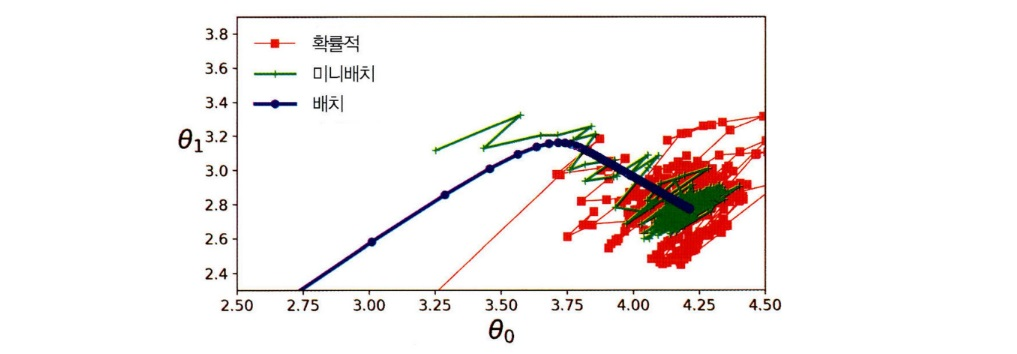


- 모두 최솟값 근처에 도달했지만 **배치 경사 하강법의 경로가 실제로 최솟값**에 멈춘 반면, **확률적 경사 하강법과 미니배치 경사 하강법은 근처**에서 맴돌고 있다.
- 하지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달할 수 있다.

### 4-2. 경사 하강법
지금까지 논의한 알고리즘을 선형 회귀를 사용하여 비교하면 다음 표와 같다. m은 훈련 샘플 수, n은 특성 수를 의미한다.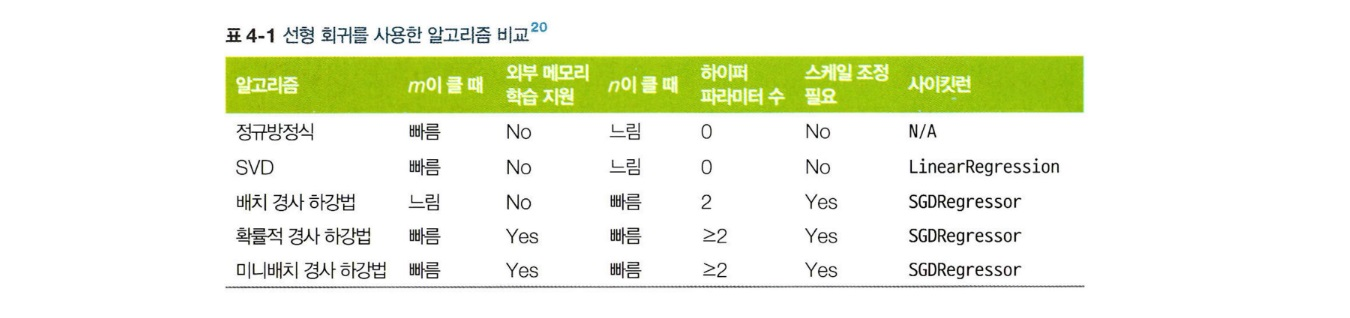

### 4-3. 다항 회귀
- 비선형 데이터를 학습하기 위해 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터 세트를 선형 모델에 훈련시키는 기법을 **다항 회귀**라고 한다.
- 예를 들어 먼저 간단한 2차방정식으로 약간의 잡음을 포함한 비선형 데이터를 생성한다.
- 확실히 직선은 이 데이터에 잘 맞지 않는다. 사이킷런의 **PolynomialFeatures**를 사용하여 **훈련 데이터를 변환**한다.
- 훈련 세트 X에 있는 **각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가**한 데이터를 X_poly라고 한다. X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함한다.
- 이 확장된 훈련 데이터에 LinearRegression을 적용한다.
--- 
- 특성이 여러 개일때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다. PolynomialFeatures가 지정한 degree 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.
- 예를 들어 2개의 특성 $a, b$가 있을 때, degree=3으로 PolynomialFeatures을 적용하면 $a^2, a^3, b^2, b^3$뿐만 아니라 $ab, a^2b, ab^2$도 특성으로 추가한다.

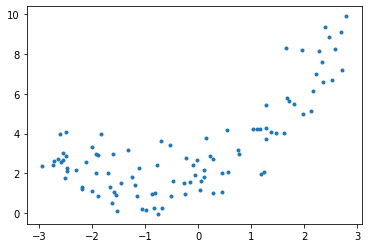

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, ".")
plt.show()

In [ ]:
# 각 특성을 제곱하여 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.96606917]
[1.96606917 3.86542797]


In [ ]:
# X_poly에 LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93910157]), array([[1.08119177, 0.53585282]]))

### 4-4. 학습 곡선
- 고차 다항 회귀를 적용하면 보통의 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.
- 예를 들어 다음 그림은 300차 다항 회귀 모델을 이전의 훈련 데이터에 적용한 것이다.
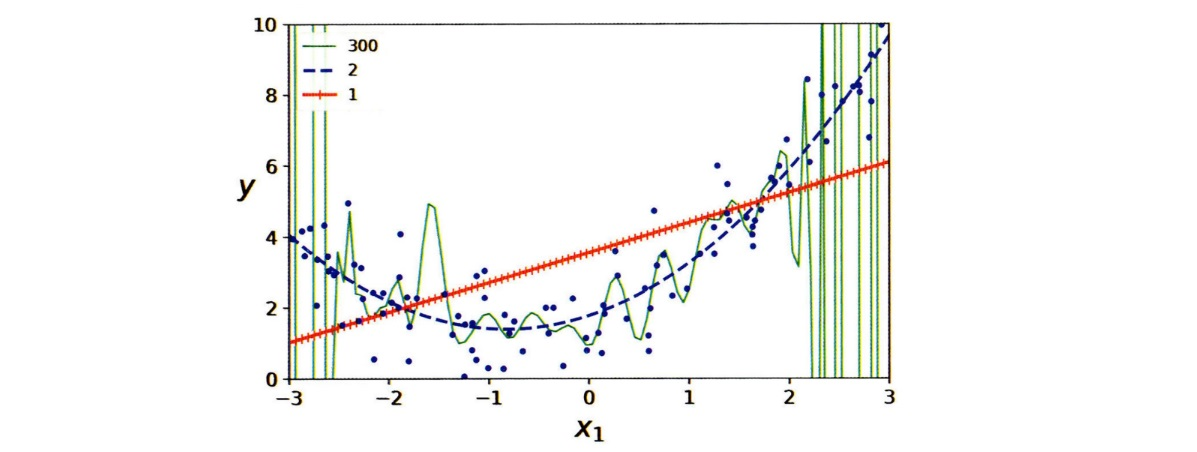
- 300차 다항 회귀 모델은 훈련 샘플에 가능한 한 가까이 가려고 구불구불하게 나타난다.
- 이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합인 반면, 선형 모델은 과소적합이다. 
- 이 경우 가장 일반화가 잘된 모델은 2차 다항 회귀인데, 2차방정식으로 생성한 데이터이기 때문에 당연한 결과지만 일반적으로는 어떤 함수로 데이터가 생성되었는지 알 수 없다.

#### 4-4. 학습 곡선
- 복잡한 모델을 사용하는걸 어떻게 결정할지, 어떻게 모델이 데이터에 과대적합 또는 과소적합 되었는지 확인해야 한다.
- 이전에는 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용했다. 또 다른 방법으로는 **학습 곡선**을 살펴보는 것이 있다.
- 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타낸다. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시키면 된다.
---
- 다음 코드는 주어진 훈련 데이터에서 **선형 회귀 모델의 학습 곡선**을 그리는 함수를 정의한다.
- 이 모델은 과소적합되었는데, 그림을 해석해보면 다음과 같다.
- 먼저 **빨강색 훈련 데이터**의 성능을 살펴보면 그래프가 0에서 시작하므로 훈련 세트에 **하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동**한다. 
- 하지만 **훈련 세트에 샘플이 추가됨**에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽하게 학습하는 것이 불가능해지며, 곡선이 어느 정도 평평해질 때까지 **오차가 계속 상승**한다. 그 후에는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다.
- **파란색 검증 데이터**에 대한 모델의 성능을 살펴보면 초기에 **모델이 적은 수의 훈련 샘플로 훈련**될 때는 제대로 일반화될 수 없어서 **검증 오차가 매우 크다**.
- 점점 모델에 **훈련 샘플이 추가됨**에 따라 학습이 되고 **검증 오차가 천천히 감소**한다. 하지만 선형 회귀 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 점차 완만해져서 훈련 세트의 그래프와 가까워진다.
- 이 학습 곡선이 **과소적합** 모델의 전형적인 모습으로, 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다.

In [ ]:
from numpy.lib.twodim_base import vander
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(7, 5))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val set")
    plt.xlabel("train set size", fontsize=12)
    plt.ylabel("RMSE", fontsize=12)
    plt.legend()

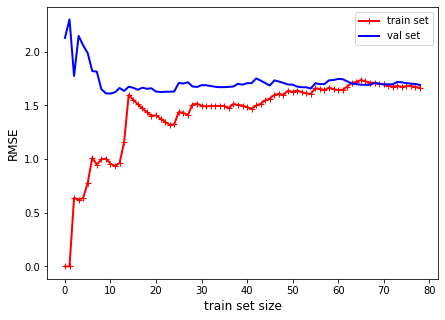

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#### 4-4. 학습 곡선
- 이제 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그려본다.
- 이 모델은 과대적합되었으며, 학습 곡선은 이전의 선형 회귀 모델과 비슷해보이지만 2가지 중요한 차이점 있다.
 - 훈련 데이터의 오차(1.0)가 선형 회귀 모델(1.5)보다 훨씬 낮다.
 - 두 곡선 사이에 공간이 있다. 이것은 **훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다**는 뜻으로, **과대적합** 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.
- 과대적합 모델을 개선하는 한가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것이다.

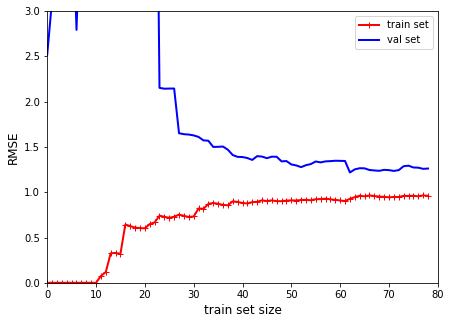

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

### 4-5. 규제가 있는 선형 모델
- 앞에서 보았듯이 **과대적합을 감소**시키는 좋은 방법은 **모델을 규제하는 것**이다. 자유도를 줄이면 데이터에 과대적합되기 더 어려워진다. 
- 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.
- 선형 회귀 모델에서는 보통 **모델의 가중치를 제한**함으로써 규제를 가한다. 각기 다른 방법으로 가중치를 제한하는 **릿지 회귀, 라쏘 회귀, 엘라스틱넷** 규제가 있다.

### 4-5. 규제가 있는 선형 모델
### 1) 릿지 회귀
- **릿지(Ridge) 회귀**는 규제가 추가된 선형 회귀 버전이다. 
- **규제항 $\displaystyle\alpha\sum_{i=1}^n\theta_i^2$ 이 비용 함수에 추가**되는데, 이는 **학습 알고리즘을 데이터에 맞추는 것**뿐만 아니라 **모델의 가중치가 가능한 한 작게 유지되도록 노력**한다.
- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.
- **릿지 회귀의 비용 함수** : $𝙹\displaystyle(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$
- 하이퍼 파라미터 $\alpha$는 **모델을 얼마나 많이 규제할지 조절**한다. 0이면 릿지 회귀는 선형 회귀와 같아지며, 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.
- $\theta$는 편향으로, $\theta_0$는 규제되지 않는다. $𝐖$를 특성의 가중치 벡터  $\theta_1$에서 $\theta_n$라고 정의하면, 규제항은 $\frac{1}{2}(||𝐖||_2)^2$ 와 같다.
- 릿지 회귀를 경사 하강법에 적용하려면 MSE 그래디언트 벡터에 $\alpha𝐖$를 더하면 된다.

### 4-5. 규제가 있는 선형 모델
### 1) 릿지 회귀

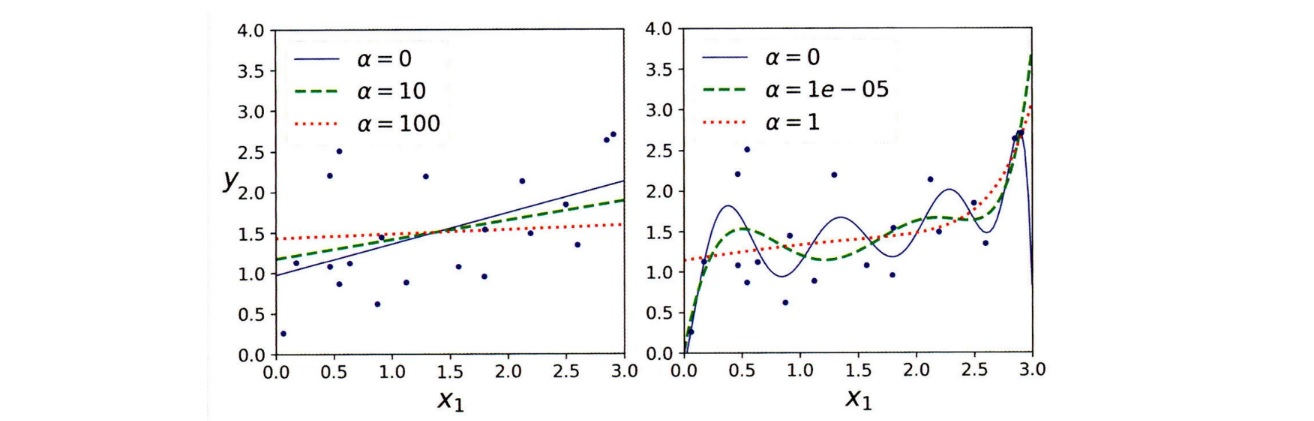
- 다음 그림은 선형 데이터에 몇 가지 다른 $\alpha$를 사용하여 릿지 모델을 훈련시킨 결과이다.
- 왼쪽 그래프는 평범한 릿지 모델을 사용하여 선형적인 예측을 만들었다.
- 오른쪽 그래프는 `PolynomialFeatures(degree=10)`을 사용하여 먼저 데이터를 10차로 확장하고, `StandardScaler`를 사용해 스케일을 조정한 후 릿지 모델을 적용했다. 결국 이는 릿지 규제를 사용한 다항 회귀가 된다.
- $\alpha$를 증가시킬수록 직선에 가까워진다. 즉 **모델의 분산은 줄어들지만 편향은 커지게 된다**.
---
- 선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고, 경사 하강법을 사용할 수도 있다.
- **릿지 회귀 정규방정식의 해**는 다음과 같다. $\hat\theta = (X^TX + \alpha A)^{-1}X^Ty$ , $A$는 편향에 해당하는 맨 왼쪽 위의 원소가 0인 (n+1)x(n+1)의 단위행렬이다.

### 4-5. 규제가 있는 선형 모델
### 1) 릿지 회귀
- 다음은 사이킷런에서 **정규방정식**을 사용한 릿지 회귀를 적용하는 예이다.
- 모델을 **`Ridge(solver="cholesky")`**로 선언한다. 이는 안드레 루이 숄레스키가 발견한 행렬 분해 방법을 사용하여 릿지 회귀 정규방정식의 해를 구하는 식을 변형한 방정식을 사용한다.
---
- **확률적 경사 하강법**을 사용한 릿지 회귀를 적용하는 예이다.
- 모델을 **`SGDRegressor(penalty="l2")`**로 선언한다. **penalty** 매개변수는 사용할 규제를 지정하는데, **"l2"**를 지정하면 **릿지 회귀와 같다**.

In [ ]:
# 정규방정식 사용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.92091759]])

In [ ]:
# 확률적 경사 하강법 사용
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.90593223])

### 4-5. 규제가 있는 선형 모델
### 2) 라쏘 회귀
- **라쏘(Lasso) 회귀**는 선형 회귀의 또 다른 규제된 버전이다. 
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만, 편향을 제곱을 2로 나눈것 대신 절댓값을 더한다.
- **라쏘 회귀의 비용 함수** : $\displaystyle𝙹(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n|\theta_i|$
- 라쏘 회귀의 중요한 특징은 **덜 중요한 특성의 가중치를 제거**하려고 한다는 점이다. 즉 라쏘 회귀는 **자동으로 특성 선택을 하고 희소 모델**을 만든다.
---
- 다음은 사이킷런의 라쏘 회귀를 적용하는 예이다.
- 확률적 경사 하강법을 사용하여 **`Lasso`** 대신 **`SGDRegressor(penalty="l1")`**을 사용할 수도 있다.

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.86503145])

In [ ]:
# 확률적 경사 하강법 사용 
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.8814095])

### 4-5. 규제가 있는 선형 모델
### 3) 엘라스틱넷
- **엘라스틱넷(ElasticNet)**은 **릿지 회귀와 라쏘 회귀를 절충한 모델**이다.
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 $r$을 사용하여 조절한다. $r=0$ 이면 **릿지 회귀**와 같고, $r=1$ 이면 **라쏘 회귀**와 같다.
- **엘라스틱넷의 비용 함수** : $\displaystyle𝙹(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$
---
- 보통 선형 회귀, 릿지 회귀, 라쏘 회귀, 엘라스틱넷을 언제 사용해야 하는지 알아야 한다.
- 적어도 규제가 있는 것이 대부분의 경우에 좋으므로 일반적으로 보통의 선형 회귀는 피해야 한다.
- 릿지가 기본이 되지만, 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷을 사용하는 것이 낫다.
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.
---
- 다음은 사이킷런의 **`ElasticNet`**을 사용한 간단한 예이다. **`l1_ratio`**가 혼합 비율을 의미한다.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86652952])

### 4-5. 규제가 있는 선형 모델
### 4) 조기 종료
- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 **검증 에러가 최솟값에 도달하면 바로 훈련을 중지**시키는 것으로, 이를 **조기 종료**라고 한다.

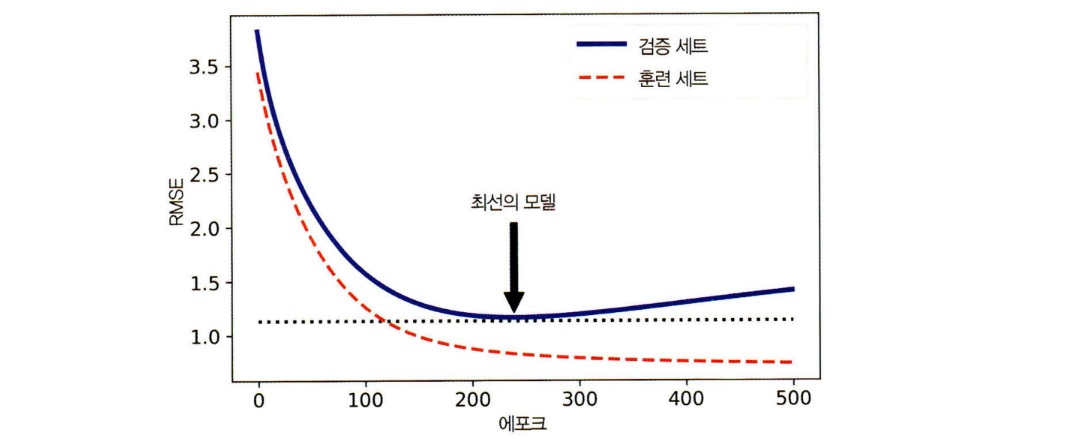
- 다음 그림은 배치 경사 하강법으로 훈련시킨 복잡한 모델이다. epoch가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러(RMSE)가 줄어든다.
- 그러나 잠시 후 **감소하던 검증 에러가 멈추었다가 다시 상승**하는데, 모델이 훈련 데이터에 **과대적합되기 시작**하는 것을 의미한다.
- **조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것**이다.
--- 
- 다음은 조기 종료를 위한 기본적인 구현 코드이다.
- SGD 모델에 **`warm_start=True`**로 지정하면 `fit( )` 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [ ]:
best_epoch, best_model

(3,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

### 4-6. 로지스틱 회귀
- 어떤 회귀 알고리즘은 분류에서도 사용할 수 있다.
- 대표적으로 로지스틱 회귀(logistic regression)는 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용된다.
- 추정 확률이 **50%가 넘으면** 모델은 그 샘플이 레이블이 **'1'인 양성 클래**스에 속한다고 예측한다. 
- 반대로 추정 확률이 **50%가 넘지 않으면** 모델은 그 샘플이 **레이블이 '0'인 음성 클래스**에 속한다고 예측한다.
- 이를 **이진 분류기**라고 한다.

### 4-6. 로지스틱 회귀
### 1) 확률 추정
- **로지스틱 회귀**는 선형 회귀 모델과 같이 입력 특성의 **가중치 합을 계산하고 편향을 더한다**. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 **결과값의 로지스틱(logistic)을 출력**한다.
- **로지스틱 회귀 모델의 확률 추정**(벡터 표현식) : $\hat{p} = h_{\theta}(x) = σ(\theta^Tx)$
- 로지스틱 $σ(.)$는 **0과 1 사이의 값을 출력**하는 **시그모이드** 함수이다. 
- 로지스틱 함수의 식과 그래프는 다음과 같다. $σ(t) = \frac{1}{1+exp(-t)}$
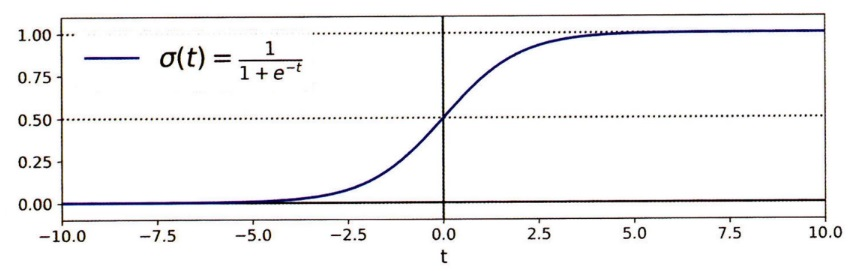
- 로지스틱 회귀 모델이 샘플 $𝘅$가 양성 클래에 속할 확률 $\hat{p} = h_{\theta}(x)$를 추정하면 이에 대한 예측을 쉽게 구할 수 있다.
$\hat{y}=
\begin{cases}
0,\ \hat{p}<0.5 \\
1,\ \hat{p}\geq0.5
\end{cases}$
- $t$를 **로짓**이라고 한다. $logit(p) = log(p/(1-p))$로, 실제로 추정확률 $p$의 로짓을 계산하면 $t$값을 얻을 수 있다.
- $t<0$이면 $σ(t)<0.5$이고, $t\geq 0$이면 $σ(t)\geq0.5$이므로 로지스틱 회귀 모델은 $t=\theta^Tx$가 양수일때 양성 클래스 1로 예측하고, 음수일 때 음성 클래스 0으로 예측한다.

### 4-6. 로지스틱 회귀
### 2) 훈련과 비용 함수
- 로지스틱 회귀 모델의 훈련 목적은 **양성 샘플(y=1)에 대해서는 높은 확률**을 추정하고, **음성 샘플(y=0)에 대해서는 낮은 확률**을 추정하는 **모델의 파라미터 벡터 $\theta$를 찾는 것**이다.
- 하나의 훈련 샘플 $𝘅$에 대해 나타낸 비용 함수에 이러한 아이디어가 드러난다. 
$c(\theta)=
\begin{cases}
-log(\hat{p}),\ y=1 \\
-log(1-\hat{p}),\ y=0
\end{cases}$
- 이 비용 함수는 $t$가 0에 가까워지면 $-log(t)$가 매우 커지므로 타당하다고 할 수 있다. 그러므로 모델이 **양성 샘플을 0에 가까운 확률**로 추정하면 **비용이 크게 증가**한다.
- 반면에 $t$가 1에 가까워지면 $-log(t)$는 0에 가까워진다. 따라서 기대한대로 **음성 샘플의 확률을 0에 가까운 확률로 추정하거나 양성 샘플의 확률을 1에 가깝게 추정**하면 **비용은 0에 가까워질 것**이다.
- 전체 훈련 세트에 대한 비용 함수는 **모든 훈련 샘플의 비용을 평균**한 것으로, 이를 **로그 손실**이라고 한다.
- **로지스틱 회귀의 비용 함수(로그 손실)** : $\displaystyle𝙹(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$
- 이 비용 함수의 최솟값을 계산하는 정규방정식 같은 것은 존재하지 않으나, 볼록 함수이므로 경사 하강법은 전역 최솟값을 찾는 것을 보장한다.

### 4-6. 로지스틱 회귀
### 3) 결정 경계
- 로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용한다. 이 데이터셋은 3개의 품종(Iris-Setosa, Iris-Versicolor, Iris-Virginica)에 속하는 150개의 꽃잎(petal)과 꽃받침(sepal)의 너비와 길이를 담고 있다.
- 꽃잎의 너비를 기반으로 Iris-Versinica 종을 감지하는 분류기를 만든다.

In [ ]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"]==2).astype(np.int) # Iris-Versinica면 1, 그렇지 않으면 0
list(iris.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

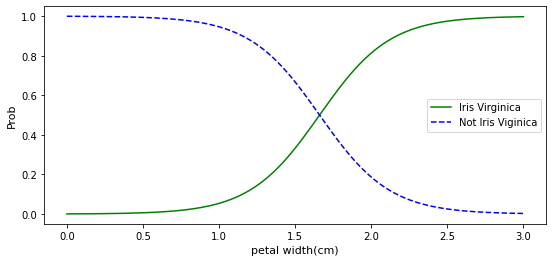

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(9, 4))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Viginica")
plt.ylabel("Prob", fontsize=11)
plt.xlabel("petal width(cm)", fontsize=11)
plt.legend()
plt.show()

### 4-6. 로지스틱 회귀
### 3) 결정 경계
- Iris-Verginica의 꽃잎 너비는 1.4-2.5cm에 분포하고, 다른 붓꽃은 일반적으로 꽃잎 너비가 더 작아 0.1-1.8cm에 분포한다.
- 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신하여 이 클래스에 대해 높은 확률을 출력하고, 1cm 아래면 Iris-Verginica가 아니라고 강하게 확신하여 Not 클래스에 대해 높은 확률을 출력한다.
- `predict( )` 메서드로 클래스를 예측하려고 하면 가장 가능성이 높은 클래스를 반환한다. 
- 그렇기 때문에 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 **결정 경계**가 만들어진다. 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 분류한다.


In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4-6. 로지스틱 회귀
### 4) 다항 로지스틱 회귀 또는 소프트맥스 회귀
- 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있는데, 이를 **소프트맥스 회귀** 또는 **다항 로지스틱 회**귀라고 한다.
- 샘플 $𝘅$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(𝘅)$를 계산하고, 그 점수에 소프트맥스 함수, 즉 정규화된 지수 함수를 적용하여 각 클래스의 확률을 추정한다.
- 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있다. 이 벡터들은 파라미터 행렬 $𝚯$에 행으로 저장된다.
- 클래스 k에 대한 소프트맥스 점수 : $s_k(𝘅) = (\theta^{(k)})^T𝘅$
- 샘플 $𝘅$에 대해 **각 클래스의 점수가 계산**되면 **소프트맥스 함수를 통과**시켜 **클래스 k에 속할 확률 $\hat{p_k}$를 추정**할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화한다. 일반적으로 이 점수를 **로짓 또는 로그-오즈**라고 한다.
- 로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택한다.
- 소프트맥스 회귀 분류기의 예측 : $\hat{y}$ = argmax $σ(s(𝘅))_k$  = argmax $s_k(𝘅)$ = argmax $((\theta^{(k)})^T𝘅)$

### 4-6. 로지스틱 회귀
### 4) 다항 로지스틱 회귀 또는 소프트맥스 회귀
- 모델의 훈련은 모델이 **타겟 클래스에 대해서는 높은 확률**을, **다른 클래스에 대해서는 낮은 확률**을 추정하도록 만드는 것이 목적이다.
---
- 소프트맥스 회귀를 사용하여 붓꽃을 3개의 클래스로 분류한다.
- 사이킷런의 **`LogisticRegression`**은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용한다.
- 하지만 **`multi_class="multinomial"`**로 하면 **소프트맥스 회귀**를 사용할 수 있다. 소프트맥스 회귀를 사용하려면 **`solver="lbfgs"`**와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다.
- 또한 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 l2 규제가 적용된다.
---
- 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고, 이 붓꽃의 품종이 무엇인지 알기 위해 모델로 예측하면 94.2%의 확률로 클래스 2인 Iris-Verginica라고 출력한다.

In [ ]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
# 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃의 클래스 예측
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
# 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃의 클래스 예측확률
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])